# Import Libraries

In [1]:
import shap
import joblib
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
# Set SHAP Visualization in notebook

shap.initjs()

# Load Data and Models

In [3]:
# Load the trained model

model_xgb = joblib.load(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\models\xgb_model.pkl")
model_rf = joblib.load(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\models\rf_model.pkl")

In [4]:
data = pd.read_csv(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\data\processed\loan_data_processed.csv")

In [5]:
x = data.drop("loan_status", axis = 1)
y = data["loan_status"]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Create SHAP Explainer

In [7]:
# Create SHAP Explainer (for tree-based models)

explainer_xgb = shap.TreeExplainer(model_xgb)
explainer_rf = shap.TreeExplainer(model_rf)

In [8]:
# Calculate SHAP values for test set

shap_values_rf = explainer_rf.shap_values(x_test)
shap_values_xgb = explainer_xgb.shap_values(x_test)

# SHAP Plot Summary (Global Feature Importance)

<Figure size 640x480 with 0 Axes>

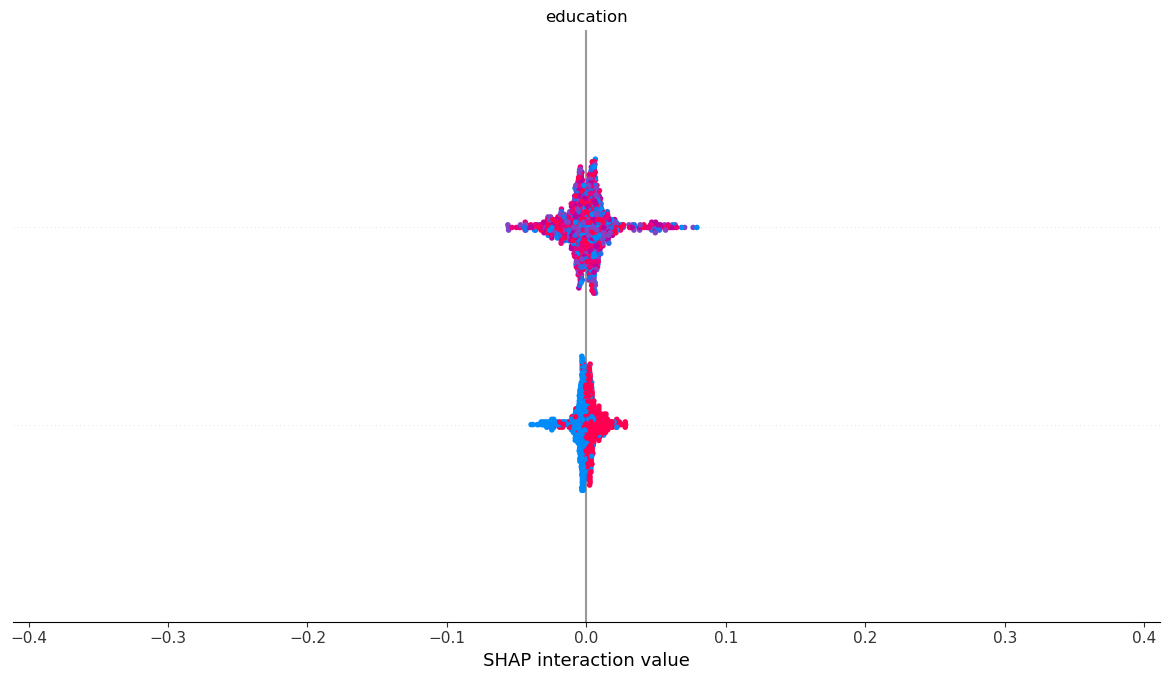

In [9]:
# Summary plot shows which feature impact prediction the most

shap.summary_plot(shap_values_rf, x_test)

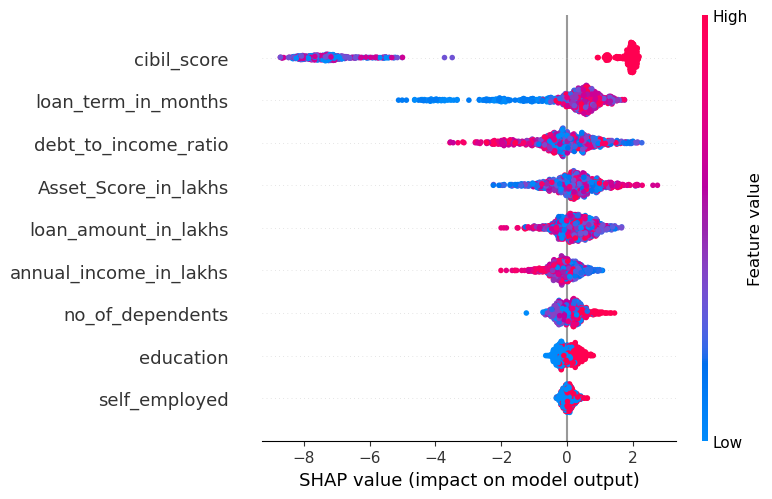

In [10]:
shap.summary_plot(shap_values_xgb, x_test)

# SHAP Bar Plot (Mean Absolute SHAP Value)

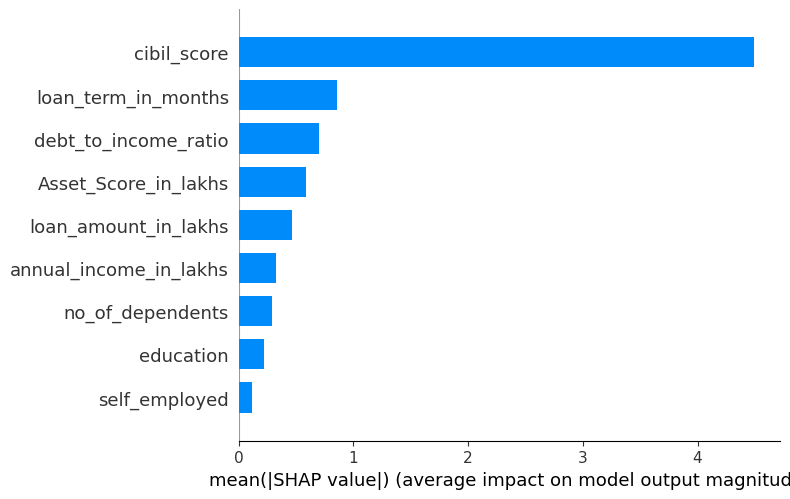

In [36]:
shap.summary_plot(shap_values_rf, x_test, plot_type = "bar")

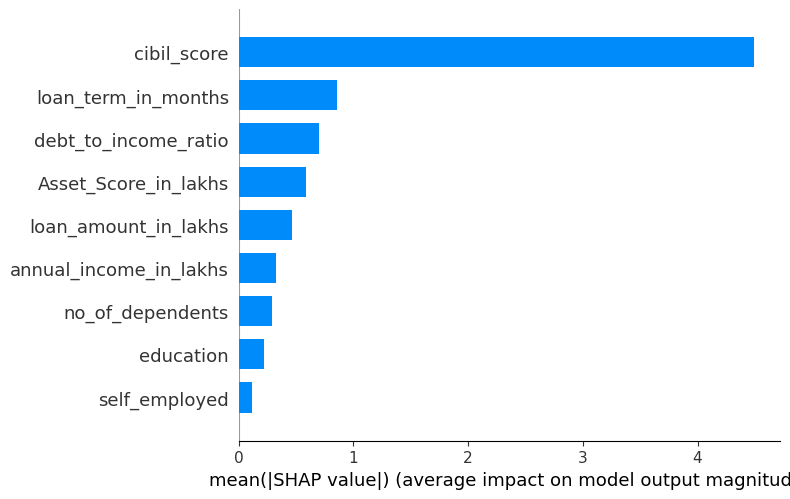

In [11]:
shap.summary_plot(shap_values_xgb, x_test, plot_type = "bar")

# SHAP Force Plot (Local Explanation for Individual Prediction)

In [12]:
# Visulaize the explanation for one prediction 

shap.force_plot(explainer_rf.expected_value, shap_values_rf[0], x_test.iloc[0])

TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

In [13]:
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb[0], x_test.iloc[0])

# SHAP Dependence Plot (Effect of Feature Value)

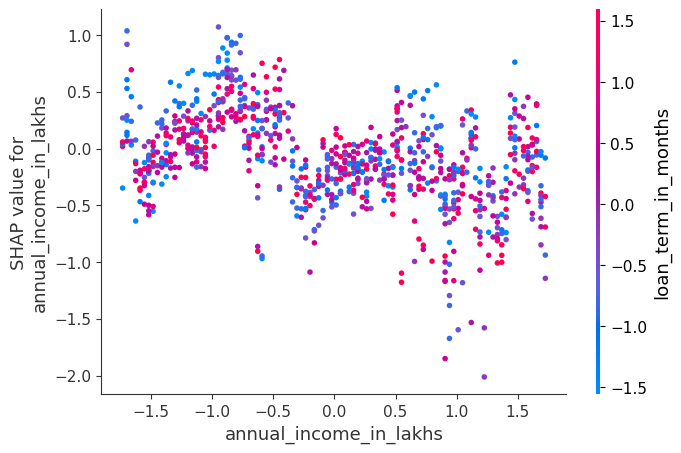

In [39]:
# Pick any important feature from summary plot

shap.dependence_plot("annual_income_in_lakhs", shap_values, x_test)